<a href="https://colab.research.google.com/github/aruaru0/Foursquare-Location-Matching/blob/main/lightgbm_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

cancer = load_breast_cancer()
print(cancer.keys())
# dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
df = pd.DataFrame(cancer['data'])
df['target'] =  cancer['target']
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
X = cancer.data # Numpy array
y = cancer.target # Numpy array
feature_names = cancer.feature_names.tolist()

X_train, X_validation, y_train, y_validation  = \
    train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape, y_train.shape)
# (398, 30) (398, 1)

(398, 30) (398,)


In [ ]:
feature_names

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [ ]:
train_data = lgb.Dataset(
    data=X_train, 
    label=y_train, 
    feature_name=feature_names
)

validation_data = lgb.Dataset(
    data=X_validation, 
    label=y_validation, 
    feature_name=feature_names
)

print(train_data.data)
print(train_data.label)


[[1.149e+01 1.459e+01 7.399e+01 ... 7.431e-02 2.941e-01 9.180e-02]
 [1.049e+01 1.861e+01 6.686e+01 ... 6.528e-02 2.213e-01 7.842e-02]
 [1.225e+01 1.794e+01 7.827e+01 ... 8.211e-02 3.113e-01 8.132e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]
[1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1
 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1
 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 

In [ ]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 64,
    'min_data_in_leaf': 20,
    'max_depth': 7,
    'verbose': 0,
}

In [ ]:
bst = lgb.train(
    params=params, 
    train_set=train_data, 
    num_boost_round=100, 
    early_stopping_rounds=20,
    valid_sets=[validation_data]
)


[1]	valid_0's binary_logloss: 0.586823
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's binary_logloss: 0.526709
[3]	valid_0's binary_logloss: 0.477581
[4]	valid_0's binary_logloss: 0.436374
[5]	valid_0's binary_logloss: 0.399281
[6]	valid_0's binary_logloss: 0.368684
[7]	valid_0's binary_logloss: 0.341196
[8]	valid_0's binary_logloss: 0.320019
[9]	valid_0's binary_logloss: 0.297784
[10]	valid_0's binary_logloss: 0.280079
[11]	valid_0's binary_logloss: 0.263674
[12]	valid_0's binary_logloss: 0.243988
[13]	valid_0's binary_logloss: 0.232776
[14]	valid_0's binary_logloss: 0.219112
[15]	valid_0's binary_logloss: 0.209271
[16]	valid_0's binary_logloss: 0.196341
[17]	valid_0's binary_logloss: 0.186051
[18]	valid_0's binary_logloss: 0.174711
[19]	valid_0's binary_logloss: 0.164423
[20]	valid_0's binary_logloss: 0.159226
[21]	valid_0's binary_logloss: 0.150806
[22]	valid_0's binary_logloss: 0.144098
[23]	valid_0's binary_logloss: 0.13775
[24]	valid_0's binary_loglos

In [ ]:
bst.save_model('model.txt', num_iteration=bst.best_iteration)

In [ ]:
y_pred = bst.predict(X_validation, num_iteration=bst.best_iteration)
y_pred = y_pred.round(0)

In [ ]:
y_test = y_validation

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
print(f"accuracy score: {accuracy:0.4f}")
# accuracy score: 0.9825

accuracy score: 0.9883


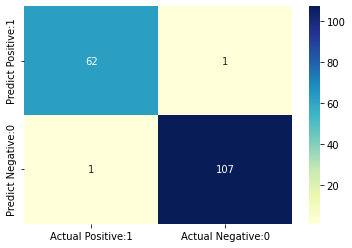

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')